[[0, 1], [1, 0], [0, 1], [0, 1], [0, 1], [1, 0], [0, 1], [1, 0], [0, 1], [0, 1], [1, 0], [0, 1], [1, 0], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [0, 1], [0, 1], [1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [1, 0], [1, 0], [0, 1], [1, 0], [0, 1], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [1, 0], [0, 1], [1, 0], [0, 1], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [1, 0], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [1, 0], [1, 0], [1, 0], [0, 1], [1, 0], [0, 1], [0, 1]]


<Figure size 432x288 with 0 Axes>

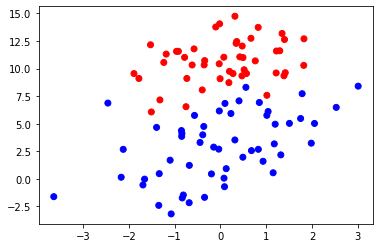

In [1]:
import numpy as np
import matplotlib.pyplot as plt
fr =open("E:/MLiA_SourceCode/machinelearninginaction/Ch05/testSet.txt","r")
dots = []
label = []
for line in fr.readlines():
    lineArr = line.strip().split()
    tmp = [ float(item) for item in lineArr]
    dots.append(tmp[:-1])
    label.append(int(tmp[-1]))
plt.figure()
tmplabel =[]
labels = []
for elem in label:
    tmplabel.append(elem)
    tmplabel.append(0) if (elem ==1)  else tmplabel.append(1)
    labels.append(tmplabel)
    tmplabel = []
print(labels)
dots = np.array(dots)

plt.figure()
color = ['r', 'b']
plt.scatter(dots[:,0], dots[:,1],  c=[color[0] if label[i]==0 else color[1] for i in range(len(label))]  )
labels = np.array(labels)


In [3]:
import torch
import torch.nn as NN

# class Classfifier(NN.Module):
#     def __init__(self):
#         super(Classfifier, self).__init__()
#         self.fc1 = NN.Linear(2, 50)
#         self.fc2 = NN.Linear(50, 1)
#         self.ac_f = NN.Sigmoid()
#         self.loss_fn = NN.MSELoss()
#         self.optimizier = torch.optim.Adam()
#     def forward(self, x):
#         x = self.ac_f(self.fc1(x))
#         x = self.ac_f(self.fc2(x))
#         return x
# dots = torch.from_numpy(dots)
# label = torch.from_numpy(np.array(label))

model = NN.Sequential(
    NN.Linear(2, 50),
    NN.Sigmoid(),
    NN.Linear(50, 2),
    NN.Sigmoid(),
    NN.Softmax(dim=1)
)
optimizier = torch.optim.Adam(model.parameters(),lr = 1e-4)
epoch = 5000
dots = torch.tensor(dots, dtype=torch.float32)
labels = torch.tensor(labels, dtype = torch.float32)

loss_fn = NN.MSELoss()
losses = []
for i in range(epoch):
    y_pred = model(dots)
    loss = loss_fn(y_pred, labels)
    losses.append(loss.item())
    optimizier.zero_grad()
    loss.backward()
    optimizier.step()
pred_tuple = (1 , 0)
rs = torch.argmax(y_pred,dim=1)
ec = 0
for circle in range(y_pred.size()[0]):
    if(pred_tuple[rs[circle].item()] != label[circle]):
        ec = ec + 1
#     print(pred_tuple[rs[circle].item()], label[circle])
print("error Rate is {}" .format(ec/len(label)))
for para in model.parameters():
    print(para.size(), para)
# plt.scatter(dots[:,0], dots[:,1], c= [color[0] if label[i]==0 else color[1] for i in range(len(label))]  )


<ipython-input-3-0f8ec95fd42f>:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dots = torch.tensor(dots, dtype=torch.float32)
<ipython-input-3-0f8ec95fd42f>:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype = torch.float32)


error Rate is 0.04
torch.Size([50, 2]) Parameter containing:
tensor([[ 0.8007, -0.2901],
        [-0.5988, -0.2346],
        [-0.3335,  0.2675],
        [ 0.5038, -0.2782],
        [-0.8639,  0.3248],
        [ 0.2741,  0.2348],
        [ 0.5760, -0.2756],
        [-0.3427,  0.9987],
        [-1.0296,  0.2804],
        [ 1.0237,  0.2607],
        [-0.7323, -0.2244],
        [ 0.2987, -0.2176],
        [-0.6893,  0.2880],
        [ 0.3470, -0.2758],
        [ 0.3405, -0.2564],
        [ 0.2558,  0.2697],
        [ 0.7701, -0.3342],
        [-0.6468,  0.7890],
        [-0.6427, -0.2304],
        [-0.9395,  1.0410],
        [ 0.6743, -0.2885],
        [-0.5975,  0.7784],
        [ 0.5557, -0.1987],
        [-0.7956,  0.2818],
        [ 0.2051,  0.7752],
        [-0.8192,  1.0655],
        [ 0.2931, -0.2775],
        [-0.3968,  0.2026],
        [-0.9099,  0.9889],
        [ 0.5180,  0.2202],
        [-0.8764,  0.9371],
        [ 1.0432, -0.2826],
        [-0.0085, -0.2777],
        [ 0.252

tensor([43, 85, 19, 45, 55, 48, 35, 41, 95, 15, 17, 59, 25, 45, 80, 53, 73, 29,
        86, 92])
